<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/Notebooks/report_2_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by saving a copy of this **notebook** in your Google Drive.

# Sampling Distributions


---
Your name

In [ ]:
from datetime import date

today = date.today()
print(today)

## Sampling a uniform discrete distribution

**Exercise A1**: for M=2000 trials try to generate N=2000 random integer numbers between 1 and 20 and calculate their average. Plot one representative histogram, the histogram of the average and calculate its standard deviation.

**Exercise A2**: Calculate and plot the average and the standard deviation of the average for N integer numbers between 1 and 20 by keeping M=20 fixed and increasing the number N between 1 and 2000.

**Exercise A3**: Calculate and plot the average and the standard deviation of the average for N integer numbers between 1 and 20 by keeping N=20 fixed and increasing the number of trials M between 1 and 2000.

What do you observe?

## Sampling a Gaussian distribution

**Exercise B1**: for M=20 trials try to generate N=20 random numbers from a Gaussian centered in 10.5 with a standard deviation of 5.7663 and calculate their average. Plot one representative histogram, the histogram of the average and calculate its standard deviation.

**Exercise C2**: Calculate and plot the average and the standard deviation of the average for N real numbers from a Gaussian centered in 10.5 with a standard deviation of 5.7663 by keeping M=20 fixed and increasing the number N between 1 and 2000.

**Exercise C3**: Calculate and plot the average and the standard deviation of the average for N real numbers from a Gaussian centered in 10.5 with a standard deviation of 5.7663 by keeping N=20 fixed and increasing the number of trials M between 1 and 2000.

## Sampling a multimodal distribution

**Exercise 2**: Try to plot how good are the estimated standard deviation and average as a function of the number N sampled from a Gaussian (centered in 0 and with a standard deviation of 1).

**Exercise 3**: combine two Gaussian one centered in 0 and one centered in 2 the first with a standard deviation of 1 the second with a standard deviation on 0.1. Try to plot how good are the estimated standard deviation and average as a function of the number N sampled.

True Mean of Combined Distribution: 1.0
True Standard Deviation of Combined Distribution: 1.2267844146385296


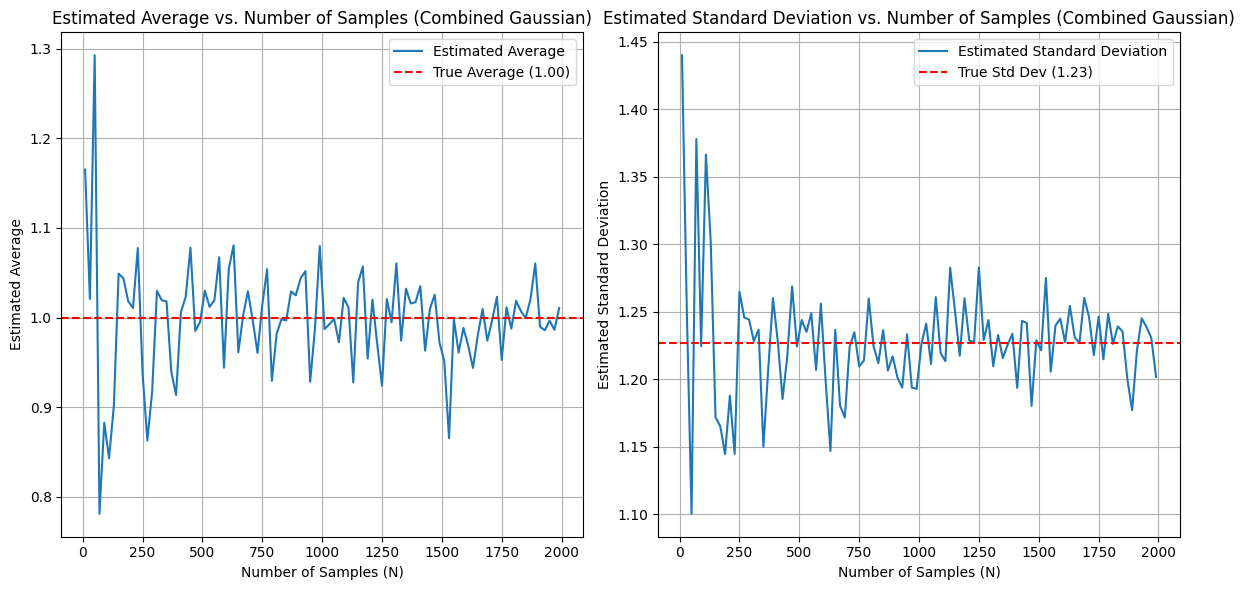

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the two Gaussian distributions
mu1 = 0
sigma1 = 1
mu2 = 2
sigma2 = 0.1

# Define a function to sample from the combined distribution
def sample_from_combined_gaussian(N):
    # Randomly choose which distribution to sample from for each number (50/50 chance)
    choice = np.random.choice([1, 2], size=N)

    samples = np.zeros(N)
    samples[choice == 1] = np.random.normal(mu1, sigma1, size=np.sum(choice == 1))
    samples[choice == 2] = np.random.normal(mu2, sigma2, size=np.sum(choice == 2))

    return samples

# Calculate the true mean and standard deviation of the combined distribution
# For a mixture of two distributions with means mu1, mu2, std devs sigma1, sigma2
# and weights w1, w2 (here w1=w2=0.5):
# True Mean (E[X]) = w1*mu1 + w2*mu2
# True Variance (Var[X]) = w1*(sigma1^2 + mu1^2) + w2*(sigma2^2 + mu2^2) - (E[X])^2
# True Standard Deviation = sqrt(Var[X])

w1 = 0.5
w2 = 0.5
true_mean_combined = w1 * mu1 + w2 * mu2
true_variance_combined = w1 * (sigma1**2 + mu1**2) + w2 * (sigma2**2 + mu2**2) - (true_mean_combined)**2
true_std_dev_combined = np.sqrt(true_variance_combined)

print(f"True Mean of Combined Distribution: {true_mean_combined}")
print(f"True Standard Deviation of Combined Distribution: {true_std_dev_combined}")


# Range of N values to test
N_values = range(10, 2001, 20) # Increased range to see convergence better

# Lists to store the estimated averages and standard deviations
estimated_averages_combined = []
estimated_std_devs_combined = []

# Perform simulations for each N
for N in N_values:
    # Generate N random numbers from the combined distribution
    random_numbers_combined = sample_from_combined_gaussian(N)

    # Calculate the estimated average and standard deviation
    estimated_average_combined = np.mean(random_numbers_combined)
    estimated_std_dev_combined = np.std(random_numbers_combined)

    # Append the estimates to the lists
    estimated_averages_combined.append(estimated_average_combined)
    estimated_std_devs_combined.append(estimated_std_dev_combined)

# Plot the estimated average as a function of N
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(N_values, estimated_averages_combined, label='Estimated Average')
plt.axhline(true_mean_combined, color='r', linestyle='--', label=f'True Average ({true_mean_combined:.2f})')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Estimated Average")
plt.title("Estimated Average vs. Number of Samples (Combined Gaussian)")
plt.legend()
plt.grid(True)

# Plot the estimated standard deviation as a function of N
plt.subplot(1, 2, 2)
plt.plot(N_values, estimated_std_devs_combined, label='Estimated Standard Deviation')
plt.axhline(true_std_dev_combined, color='r', linestyle='--', label=f'True Std Dev ({true_std_dev_combined:.2f})')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Estimated Standard Deviation")
plt.title("Estimated Standard Deviation vs. Number of Samples (Combined Gaussian)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

a = 1
b = 20

# Standard deviation for a discrete uniform distribution
std_dev = np.sqrt(((b - a + 1)**2 - 1) / 12)

print(f"The standard deviation of a uniform discrete distribution between {a} and {b} is: {std_dev}")

The standard deviation of a uniform discrete distribution between 1 and 20 is: 5.766281297335398
